In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


## Importing dataset


In [8]:
#from google.colab import drive
#drive.mount('/content/gdrive')

In [9]:
data = pd.read_csv('../input/diabetes.csv')

In [10]:
data.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


## Exploratory Data Analysis

In [11]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Pregnancies                 768 non-null int64
Glucose                     768 non-null int64
BloodPressure               768 non-null int64
SkinThickness               768 non-null int64
Insulin                     768 non-null int64
BMI                         768 non-null float64
DiabetesPedigreeFunction    768 non-null float64
Age                         768 non-null int64
Outcome                     768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


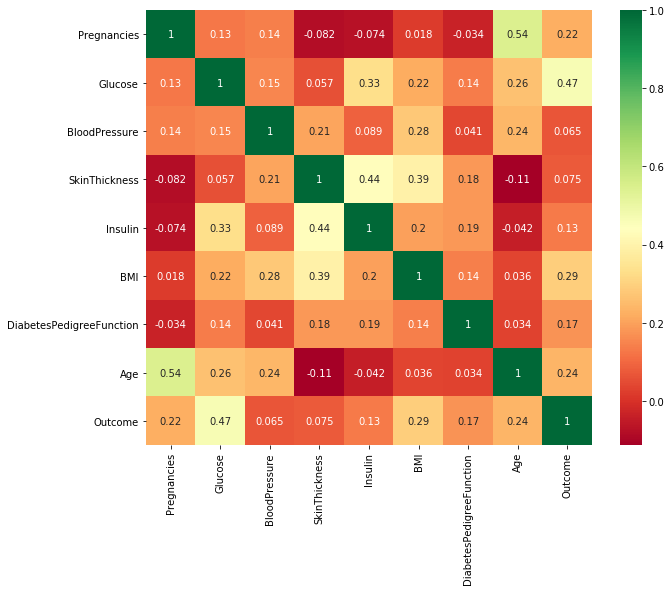

In [13]:
datacorr = data.corr()
sns.heatmap(data[data.columns[:9]].corr(),annot=True,cmap='RdYlGn')
fig=plt.gcf()
fig.set_size_inches(10,8)
plt.show()

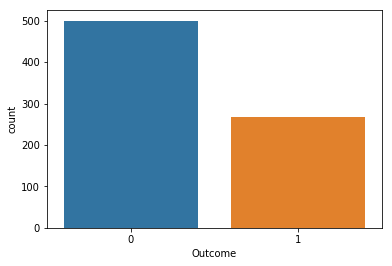

In [14]:
sns.countplot(data.Outcome)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fde3cc61e10>,
      dtype=object)

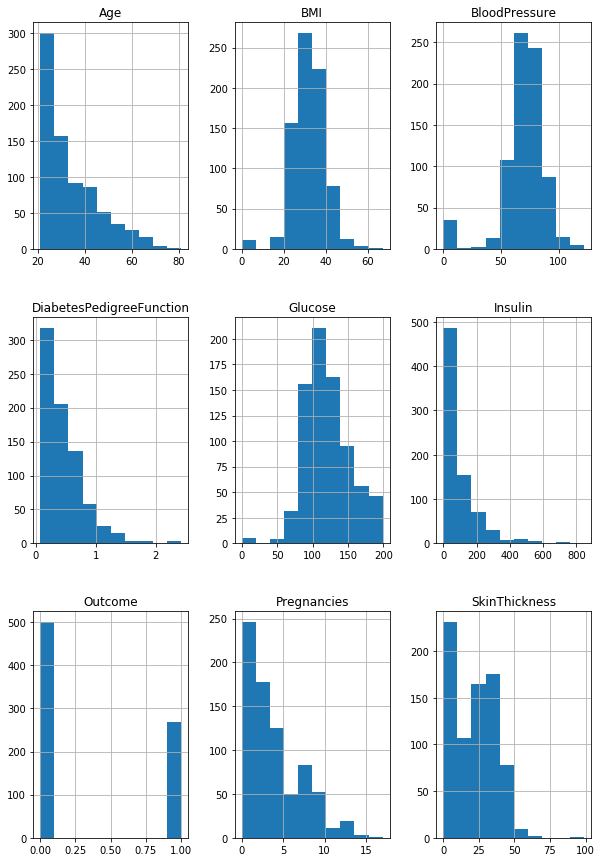

In [15]:

data.hist(figsize=(10, 15))

In [16]:
data1 = data[(data['BloodPressure']!=0) & (data['BMI']!=0) & (data['Glucose']!=0)]

In [17]:
data1.count()

Pregnancies                 724
Glucose                     724
BloodPressure               724
SkinThickness               724
Insulin                     724
BMI                         724
DiabetesPedigreeFunction    724
Age                         724
Outcome                     724
dtype: int64

In [18]:
data1 = data

In [19]:

onlydiabetic = data[(data['Outcome']==1)]
onlydiabetic.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
2,8,183,64,0,0,23.3,0.672,32,1
4,0,137,40,35,168,43.1,2.288,33,1
6,3,78,50,32,88,31.0,0.248,26,1
8,2,197,70,45,543,30.5,0.158,53,1


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fde48b997b8>,
      dtype=object)

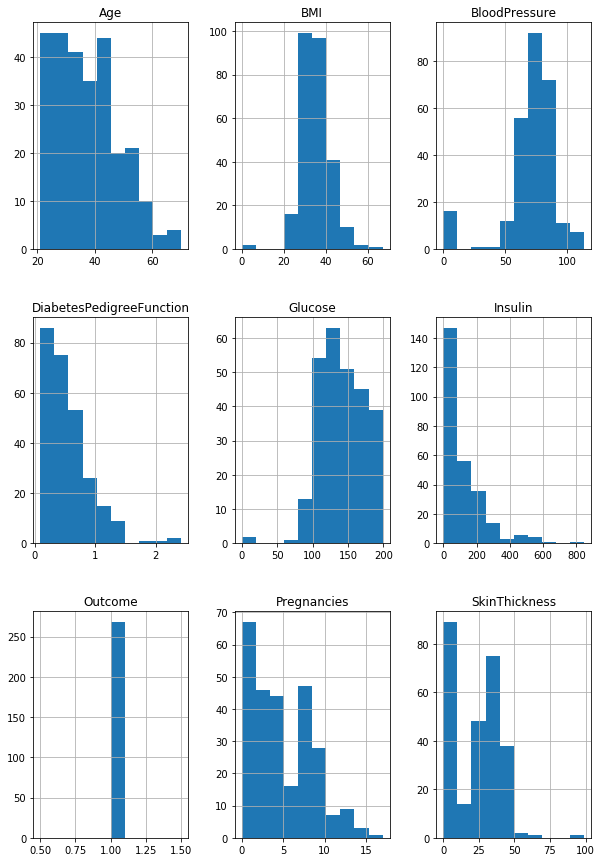

In [20]:
onlydiabetic.hist(figsize=(10,15))

## Model Building

In [21]:
import sklearn 

In [22]:
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier

In [23]:
from sklearn.model_selection import GridSearchCV


In [24]:
x = data[data.columns[:8]]
x.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


In [25]:
y= data['Outcome']
y.head(5)

0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64

In [26]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3)

In [27]:
x_test

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
114,7,160,54,32,175,30.5,0.588,39
591,2,112,78,50,140,39.4,0.175,24
122,2,107,74,30,100,33.6,0.404,23
605,1,124,60,32,0,35.8,0.514,21
561,0,198,66,32,274,41.3,0.502,28
579,2,197,70,99,0,34.7,0.575,62
621,2,92,76,20,0,24.2,1.698,28
531,0,107,76,0,0,45.3,0.686,24
96,2,92,62,28,0,31.6,0.130,24
349,5,0,80,32,0,41.0,0.346,37


### Model 1 : Logistic  Regression

In [28]:
model1 = LogisticRegression()
model1.fit(x_train,y_train)
prediction = model1.predict(x_test)
accuracy = metrics.accuracy_score(prediction, y_test)

print("Logistic regression provides an accuracy of ", accuracy)

Logistic regression provides an accuracy of  0.7142857142857143


/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


#### GridSearch CV Logistic regression


In [29]:
for param in model1.get_params().keys():
    print(param)

C
class_weight
dual
fit_intercept
intercept_scaling
max_iter
multi_class
n_jobs
penalty
random_state
solver
tol
verbose
warm_start


In [30]:
# Create regularization penalty space
penalty = ['l1', 'l2']

# Create regularization hyperparameter space
C = np.logspace(0, 4, 10)

# Create hyperparameter options
hyperparameters = dict(C=C, penalty=penalty)

clf = GridSearchCV(model1, hyperparameters, cv=5, verbose=0)

best_model = clf.fit(x_train, y_train)

best_model.best_estimator_


/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  Futur

/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  Futur

/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  Futur

LogisticRegression(C=2.7825594022071245, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='warn', n_jobs=None, penalty='l2', random_state=None,
          solver='warn', tol=0.0001, verbose=0, warm_start=False)

In [31]:
model_LR = LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l1', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)
model_LR.fit(x_train,y_train)
prediction_LR = model_LR.predict(x_test)
accuracy_LR = metrics.accuracy_score(prediction_LR, y_test)

print("Logistic regression provides an accuracy of ", accuracy_LR)

LogisticRegression()

Logistic regression provides an accuracy of  0.7186147186147186


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

#### Confusion matrix, precision, recall, ROC AUC)

In [32]:
from yellowbrick.classifier import ConfusionMatrix

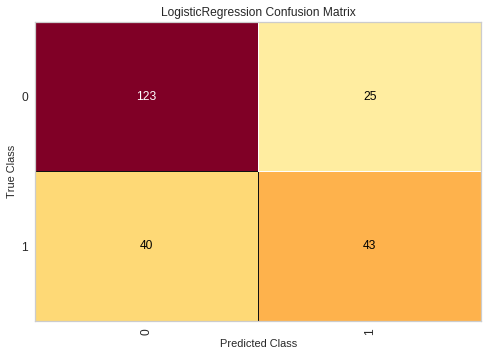

In [33]:
# The ConfusionMatrix visualizer taxes a model
cm = ConfusionMatrix(model_LR)

# Fit fits the passed model. This is unnecessary if you pass the visualizer a pre-fitted model
cm.fit(x_train, y_train)

# To create the ConfusionMatrix, we need some test data. Score runs predict() on the data
# and then creates the confusion_matrix from scikit-learn.
cm.score(x_test, y_test)

# How did we do?
cm.poof()

In [34]:
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import precision_recall_fscore_support as score
from yellowbrick.classifier import ROCAUC


In [35]:
precision_recall_fscore_support(y_test, prediction)

(array([0.74404762, 0.63492063]),
 array([0.84459459, 0.48192771]),
 array([0.79113924, 0.54794521]),
 array([148,  83]))

In [36]:
precision, recall, fscore, support = score(y_test, prediction,)

print('precision: {}'.format(precision))
print('recall: {}'.format(recall))
print('fscore: {}'.format(fscore))
print('support: {}'.format(support))

precision: [0.74404762 0.63492063]
recall: [0.84459459 0.48192771]
fscore: [0.79113924 0.54794521]
support: [148  83]


/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


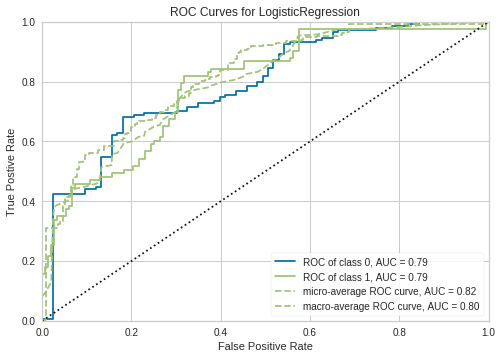

In [37]:
# Instantiate the visualizer with the classification model
visualizer = ROCAUC(model1)

visualizer.fit(x_train, y_train)  # Fit the training data to the visualizer
visualizer.score(x_test, y_test)  # Evaluate the model on the test data
g = visualizer.poof()   

### Model 2 : SVM

In [38]:
model2_without = svm.SVC()
model2_without.fit(x_train,y_train)
svm_prediction = model2_without.predict(x_test)
svm_accuracy = metrics.accuracy_score(svm_prediction, y_test)

print("SVC provides an accuracy of ", svm_accuracy)

SVC provides an accuracy of  0.6406926406926406


/opt/conda/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


#### GridSearch CV SVM

In [39]:
Cs = [0.001, 0.01, 0.1, 1, 10]
gammas = [0.001, 0.01, 0.1, 1]
param_grid = {'C': Cs, 'gamma' : gammas}
grid_search = GridSearchCV(svm.SVC(kernel='rbf'), param_grid, cv=5)
grid_search.fit(x_train, y_train)
grid_search.best_params_
  
  

{'C': 1, 'gamma': 0.001}

In [40]:
model2 = svm.SVC(C=1,gamma=0.001)
model2.fit(x_train,y_train)
svm_prediction = model2.predict(x_test)
svm_accuracy = metrics.accuracy_score(svm_prediction, y_test)

print("SVC provides an accuracy of ", svm_accuracy)

SVC provides an accuracy of  0.7012987012987013


#### Confusion matrix, precision, recall, ROC AUC)

In [41]:
from yellowbrick.classifier import ConfusionMatrix

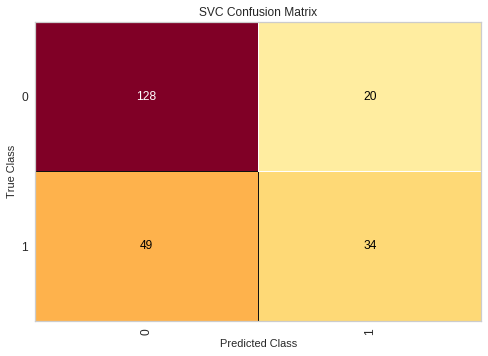

array([[128,  20],
       [ 49,  34]])

In [42]:
# The ConfusionMatrix visualizer taxes a model
cm = ConfusionMatrix(model2)

# Fit fits the passed model. This is unnecessary if you pass the visualizer a pre-fitted model
cm.fit(x_train, y_train)

# To create the ConfusionMatrix, we need some test data. Score runs predict() on the data
# and then creates the confusion_matrix from scikit-learn.
cm.score(x_test, y_test)

# How did we do?
cm.poof()

cm.confusion_matrix_

In [43]:
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import precision_recall_fscore_support as score
from yellowbrick.classifier import ROCAUC


In [44]:
precision_recall_fscore_support(y_test, svm_prediction)

(array([0.72316384, 0.62962963]),
 array([0.86486486, 0.40963855]),
 array([0.78769231, 0.49635036]),
 array([148,  83]))

In [45]:
precision, recall, fscore, support = score(y_test, svm_prediction)

print('precision: {}'.format(precision))
print('recall: {}'.format(recall))
print('fscore: {}'.format(fscore))
print('support: {}'.format(support))

precision: [0.72316384 0.62962963]
recall: [0.86486486 0.40963855]
fscore: [0.78769231 0.49635036]
support: [148  83]


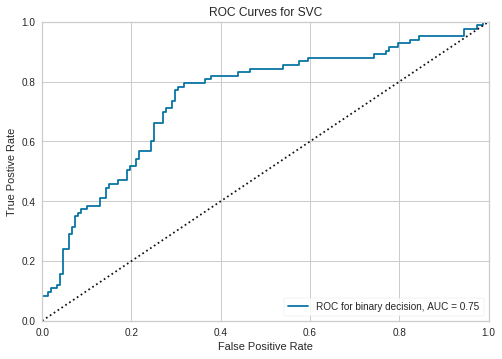

In [46]:
# Instantiate the visualizer with the classification model
visualizer = ROCAUC(model2, micro=False, macro=False, per_class=False)

visualizer.fit(x_train, y_train)  # Fit the training data to the visualizer
visualizer.score(x_test, y_test)  # Evaluate the model on the test data
g = visualizer.poof()   

### Model 3 : Random Forest

In [47]:
model3 = RandomForestClassifier()
model3.fit(x_train,y_train)
rf_prediction = model3.predict(x_test)
rf_accuracy = metrics.accuracy_score(rf_prediction, y_test)

print("Random Forest provides an accuracy of ", rf_accuracy)

Random Forest provides an accuracy of  0.7012987012987013


/opt/conda/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


#### GridSearch CV Random Forest

In [48]:
param_grid = {
    'n_estimators': [200, 700],
    'max_features': ['auto', 'sqrt', 'log2']
}

CV_rfc = GridSearchCV(estimator=model3, param_grid=param_grid, cv= 5)

CV_rfc.fit(x_train,y_train)

CV_rfc.best_estimator_

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='sqrt', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [49]:
model_RFC = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)
model_RFC.fit(x_train,y_train)
rfc_prediction = model_RFC.predict(x_test)
rfc_accuracy = metrics.accuracy_score(rfc_prediction, y_test)

print("Random Forest provides an accuracy of ", rfc_accuracy)



Random Forest provides an accuracy of  0.7316017316017316


In [50]:
print("the best score is %s"%CV_rfc.best_score_)  
print("the best parameter value that resulted in the best performance is %s"%CV_rfc.best_estimator_)  
print("the performance over test dats is %s"%CV_rfc.score(x_train, y_train) ) 


the best score is 0.7895716945996276
the best parameter value that resulted in the best performance is RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='sqrt', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)
the performance over test dats is 1.0


#### Confusion matrix, precision, recall, ROC AUC)

In [51]:
from yellowbrick.classifier import ConfusionMatrix

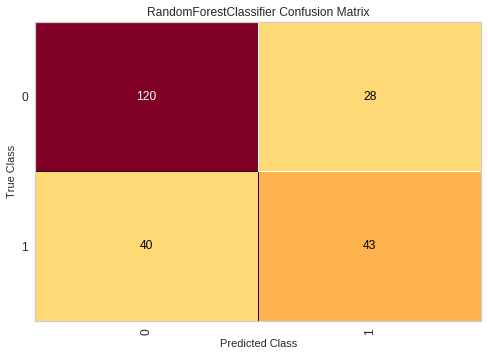

In [52]:
# The ConfusionMatrix visualizer taxes a model
cm = ConfusionMatrix(model_RFC)

# Fit fits the passed model. This is unnecessary if you pass the visualizer a pre-fitted model
cm.fit(x_train, y_train)

# To create the ConfusionMatrix, we need some test data. Score runs predict() on the data
# and then creates the confusion_matrix from scikit-learn.
cm.score(x_test, y_test)

# How did we do?
cm.poof()

In [53]:
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import precision_recall_fscore_support as score
from yellowbrick.classifier import ROCAUC


In [54]:
precision_recall_fscore_support(y_test, svm_prediction)

(array([0.72316384, 0.62962963]),
 array([0.86486486, 0.40963855]),
 array([0.78769231, 0.49635036]),
 array([148,  83]))

In [55]:
precision, recall, fscore, support = score(y_test, rf_prediction)

print('precision: {}'.format(precision))
print('recall: {}'.format(recall))
print('fscore: {}'.format(fscore))
print('support: {}'.format(support))

precision: [0.73099415 0.61666667]
recall: [0.84459459 0.44578313]
fscore: [0.78369906 0.51748252]
support: [148  83]


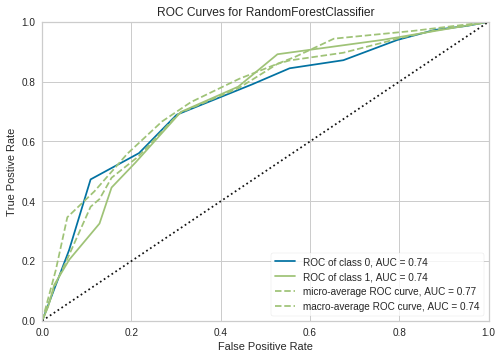

In [56]:
# Instantiate the visualizer with the classification model
visualizer = ROCAUC(model3)

visualizer.fit(x_train, y_train)  # Fit the training data to the visualizer
visualizer.score(x_test, y_test)  # Evaluate the model on the test data
g = visualizer.poof()   

## Comparing Model Accuracy 

In [57]:
results = []
models = np.array(["Logistic Regression","SVM","Random Forest"])
accuracies = np.round(np.array([accuracy_LR, svm_accuracy,rf_accuracy]),3)

a=np.append(models.reshape(-1,1),accuracies.reshape(-1,1), axis =1 )
res = pd.DataFrame(a,columns= (['Models', 'Accuracies']))
res

,Models,Accuracies
0,Logistic Regression,0.719
1,SVM,0.701
2,Random Forest,0.701


In [58]:
d = {'FP': [14,15,19] , 'TN' : [34,46,35]}
FP_TN = pd.DataFrame( d)
FP_TN

,FP,TN
0,14,34
1,15,46
2,19,35


In [59]:
result = res.reset_index().merge(FP_TN.reset_index(), how = 'inner', on = 'index')

In [60]:
result.drop(['index'], axis=1, inplace=True)

In [61]:
result

,Models,Accuracies,FP,TN
0,Logistic Regression,0.719,14,34
1,SVM,0.701,15,46
2,Random Forest,0.701,19,35


In [62]:
FP_TN.reset_index()

,index,FP,TN
0,0,14,34
1,1,15,46
2,2,19,35


In [63]:
result["Accuracies"] = result.Accuracies.astype(float)
result["Models"] = result.Accuracies.astype(str)


In [64]:

res.dtypes


Models        object
Accuracies    object
dtype: object

In [65]:
result[['Models','Accuracies']].dtypes

Models         object
Accuracies    float64
dtype: object

/opt/conda/lib/python3.6/site-packages/matplotlib/axes/_base.py:3604: MatplotlibDeprecationWarning: 
The `ymin` argument was deprecated in Matplotlib 3.0 and will be removed in 3.2. Use `bottom` instead.
  alternative='`bottom`', obj_type='argument')


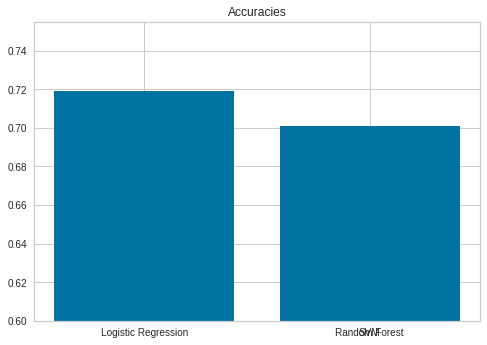

/opt/conda/lib/python3.6/site-packages/matplotlib/axes/_base.py:3604: MatplotlibDeprecationWarning: 
The `ymin` argument was deprecated in Matplotlib 3.0 and will be removed in 3.2. Use `bottom` instead.
  alternative='`bottom`', obj_type='argument')


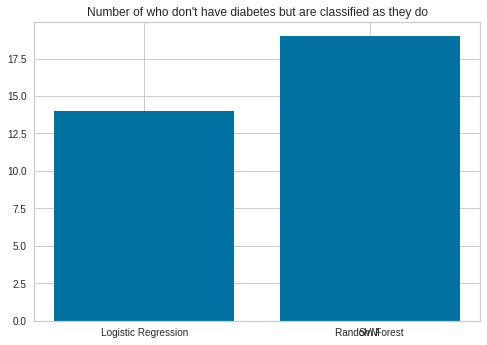

/opt/conda/lib/python3.6/site-packages/matplotlib/axes/_base.py:3604: MatplotlibDeprecationWarning: 
The `ymin` argument was deprecated in Matplotlib 3.0 and will be removed in 3.2. Use `bottom` instead.
  alternative='`bottom`', obj_type='argument')


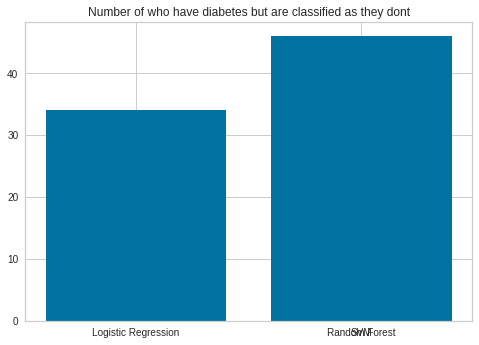

In [66]:
 
plt.bar(result.Models , result.Accuracies)
plt.xticks(result.Models, ['Logistic Regression','SVM','Random Forest'])
plt.ylim(ymin=0.6)
plt.title('Accuracies')
plt.show()


plt.bar(result.Models, result.FP)
plt.xticks(result.Models, ['Logistic Regression','SVM','Random Forest'])
plt.ylim(ymin=0)
plt.title("Number of who don't have diabetes but are classified as they do")
plt.show()

plt.bar(result.Models, result.TN)
plt.xticks(result.Models, ['Logistic Regression','SVM','Random Forest'])
plt.title("Number of who have diabetes but are classified as they dont")
plt.ylim(ymin=0)
plt.show()
